<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 미니 프로젝트 1  ##

- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

- 조건: 변수 2개 이상 연결한 결과값 포함

- 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

- 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

- 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

# 1. 라이브러리 및 데이터

In [1]:
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
plt.rc('font', family='NanumGothic')

# 마이너스(-) 기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
data=pd.read_csv('/content/movies_train.csv')
data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


### < 칼럼 상세 > ###

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# 2. 탐색적 자료분석

## 1) 데이터 요약

In [7]:
data.shape

(600, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [9]:
data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [10]:
data.nunique() #칼럼별 고유한 값 확인

,0
title,600
distributor,169
genre,12
release_time,330
time,86
screening_rat,4
director,472
dir_prev_bfnum,245
dir_prev_num,6
num_staff,296


## 2) 결측치 확인 및 처리

In [11]:
data.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


✅ 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수에 결측치가 존재함을 확인하였다.

In [12]:
data[data['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [13]:
data['dir_prev_bfnum'].fillna(0,inplace=True)
data[data['dir_prev_bfnum']==0].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,0.0,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,0.0,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,0.0,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,0.0,0,0,4,745


✅ 참여한 영화가 0인 경우에 한해 결측치가 존재함을 확인하고, 결측치를 모두 0으로 변경해주었다.

## 3) 데이터 전처리

### < release_time 자료형 바꾸기 >

- 시간과 관련된 데이터이므로 datetime 형식으로 변환해야 한다.

In [14]:
data['release_time']=pd.to_datetime(data['release_time'])
print(data['release_time'].dtypes)

datetime64[ns]


### < 영화 배급사 통일하기 >


In [15]:
#배급사 개수 파악
data['distributor'].value_counts()

,count
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
영화사 廊,1
크리에이티브컴즈(주),1
ysfilm,1


✅ 총 169개의 영화 배급사가 존재한다.

In [16]:
#배급사 종류 파악하기 위해 unique() 사용
data['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

✅ 같은 배급사임에도 표기 차이로 다르게 취급된 경우가 존재한다.

- (주) 쇼박스 / 쇼박스(주)미디어플렉스

- CGV 아트하우스 / CGV아트하우스

- 싸이더스FNH / 싸이더스 FNH / 싸이더스

- 드림팩트 엔터테인먼트 / (주)드림팩트엔터테인먼트

- (주)리틀빅픽처스 / 리틀빅픽처스 / 리틀빅픽쳐스

- (주)마운틴픽쳐스 / 마운틴픽처스

- (주)NEW / NEW

- CGV 무비꼴라쥬 / 무비꼴라쥬

- (주)시네마달 / 시네마 달 / 시네마달

- THE 픽쳐스 / (주)더픽쳐스

- (주)마인스 엔터테인먼트 / (주)마인스엔터테인먼트

- 와이드릴리즈(주) / 와이드 릴리즈(주)

- (주)에이원 엔터테인먼트 / 에이원 엔터테인먼트

- 더픽쳐스(주)마운틴픽쳐스 -> 해당 영화 '위선자들' 검색 결과 더픽쳐스와 (주)마운틴픽쳐스 공동배급, 각 배급사에 집계될 수 있도록 나눠 줄 것

- CJ 엔터테인먼트 / CJE&M영화부분 / CJE&MPictures > 검색 결과 CJE&M Movie로 통일 가능

### [ 전처리 1단계 ]  수동 mapping

✅ 같은 배급사임에도 표기가 달라 다른 데이터로 인식하는 것을 확인할 수 있다. 이를 해결하기 위해 수동 mapping으로 배급사 표기를 통일한다.

- (주) 쇼박스 / 쇼박스(주)미디어플렉스 -> 쇼박스로 통일

- 싸이더스FNH / 싸이더스 FNH / 싸이더스 -> 싸이더스로 통일

- (주)리틀빅픽처스 / 리틀빅픽처스 / 리틀빅픽쳐스 -> 리틀빅픽처스로 통일

- THE 픽쳐스 / (주)더픽쳐스 -> THE픽쳐스로 통일

- (주)마운틴픽쳐스 / 마운틴픽처스 -> 마운틴픽처스로 통일

- CGV 무비꼴라쥬 / 무비꼴라쥬 -> CGV무비꼴라쥬로 통일

- 더픽쳐스(주)마운틴픽쳐스 -> THE픽쳐스, 마운틴픽처스로 나눔

- CJ 엔터테인먼트 / CJE&M영화부분 / CJE&MPictures -> CJE&M Movie로 통일

In [17]:
distributor_map = {
    '(주)쇼박스': '쇼박스',
    '쇼박스(주)미디어플렉스': '쇼박스',

    '싸이더스FNH': '싸이더스',
    '싸이더스 FNH': '싸이더스',

    '리틀빅픽쳐스': '리틀빅픽처스',

    '(주)마운틴픽쳐스': '마운틴픽처스',

    '무비꼴라쥬': 'CGV무비꼴라쥬',

    '(주)더픽쳐스': 'THE픽쳐스',

    '더픽쳐스/(주)마운틴픽쳐스': 'THE픽쳐스, 마운틴픽처스',

    'CJ 엔터테인먼트': 'CJE&M Movie',
    'CJ E&M 영화부문': 'CJE&M Movie',
    'CJ E&M Pictures': 'CJE&M Movie'

}

#전처리 함수
data['distributor'] = data['distributor'].map(distributor_map).fillna(data['distributor'])

### [ 전처리 1단계 ] 결과 확인

- value_counts()로 데이터 개수의 변화를 확인한다.
> 169개 -> 163개
- unique()로 데이터 mapping 결과가 반영됐는지 확인한다.
> mapping이 제대로 반영됨

In [18]:
data['distributor'].value_counts()

,count
distributor,
CJE&M Movie,59
롯데엔터테인먼트,52
(주)NEW,30
마운틴픽처스,29
쇼박스,28
...,...
영화사 廊,1
크리에이티브컴즈(주),1
ysfilm,1


In [19]:
data['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', '(주)NEW', '백두대간', '유니버설픽쳐스인터내셔널코리아', '(주)두타연',
       '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이', '(주)팝 파트너스', 'CJE&M Movie',
       '(주) 영화제작전원사', 'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '마운틴픽처스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', 'CGV무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '어뮤즈',
       '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       'THE픽쳐스', '오퍼스픽쳐스', '(주)고앤고 필름', '사람과 사람들', '(주)JK필름',
       '씨너스엔터테인먼트(주)', 'KT', '싸이

### [ 전처리 2단계 ] 문자 간 공백 제거 및 공동 배급 나누기

✅ 표기가 같아도 문자 간 공백 때문에 다른 데이터로 처리되는 문제가 남아있다. 이를 해결하기 위해 replace() 메서드를 활용하여 문자 간 공백을 제거한다.

- .str -> 문자열 처리용 기능을 제공하는 pandas 속성
- replace() 함수를 이용하여 \s+(하나 이상의 공백)을 ''(빈 문자열)로 대체. 즉, 공백을 모두 제거
- regex = True -> 정규표현식으로 해석하라는 의미
> 정규표현식: 문자열 작업을 간단한 규칙 하나로 처리할 수 있도록 도와주는 도구
-  1단계에서 더픽쳐스/(주)마운틴픽쳐스 -> 'THE픽쳐스, 마운틴픽처스'로 변환한 것을 ','을 기준으로 'THE픽쳐스', '마운틴픽처스' 개별로 나누어 각 배급사에 집계될 수 있도록 함
> 쉼표 기준으로 데이터를 분리하면 ['THE픽쳐스', '마운틴픽처스']처럼 리스트 형태로 반환됨

 > 이 리스트 안의 요소들을 각각의 행으로 나타내기 위해서 explode() 메서드 활용
  
  > explode()는 기존 인덱스를 유지한 채로 행을 늘리기 때문에 인덱스가 중복되거나 어지럽게 섞이게 됨. reset_index()로 인덱스를 0부터 다시 재정렬하고 drop 인자를 True로 설정하여 기존 인덱스를 버림

In [20]:
#문자 간 공백 제거
data['distributor'] = data['distributor'].str.replace(r'\s+', '', regex=True)

In [21]:
#쉼표 기준으로 데이터 분리
data['distributor'] = data['distributor'].str.split(r',')

#분리된 데이터를 기존 행과 합치기 위한 코드
data = data.explode('distributor').reset_index(drop=True)

### [ 전처리 2단계 ] 결과 확인
- value_counts()로 데이터 개수의 변화를 확인한다.
> 163개 -> 155개
- unique()를 통해 공백이 제거되고 공동 배급사가 분리된 것이 확인 가능하다.

In [22]:
data['distributor'].value_counts()

,count
distributor,
CJE&MMovie,59
롯데엔터테인먼트,52
마운틴픽처스,33
(주)NEW,30
쇼박스,28
...,...
영화사廊,1
크리에이티브컴즈(주),1
ysfilm,1


In [23]:
data['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', '(주)NEW', '백두대간', '유니버설픽쳐스인터내셔널코리아', '(주)두타연',
       '(주)케이알씨지', '(주)콘텐츠윙', '(주)키노아이', '(주)팝파트너스', 'CJE&MMovie',
       '(주)영화제작전원사', 'CGV무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네', '영화사진진',
       '(주)레인보우팩토리', '김기덕필름', 'NEW', 'CJCGV', '동국대학교충무로영상제작센터',
       'BoXoo엔터테인먼트', '마운틴픽처스', '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21',
       '디씨드', '드림팩트엔터테인먼트', '시너지', '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아',
       '(주)예지림엔터테인먼트', '(주)영화사조제', '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트',
       '(주)패스파인더씨앤씨', '(주)대명문화공장', '(주)온비즈넷', 'KT&G상상마당', '인벤트디',
       '씨네그루(주)키다리이엔티', '스튜디오후크', '시네마달', '나이너스엔터테인먼트(주)', 'THE픽쳐스',
       '영구아트무비', '어뮤즈', '이모션픽처스', '(주)이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹',
       '타임스토리그룹', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '오퍼스픽쳐스', '(주)고앤고필름', '사람과사람들', '(주)JK필름', '씨너스엔터테인먼트(주)', 'KT',
       '싸이더스', '(주)프레인글로벌', '나우콘텐츠', '홀리가든', '(주)브릿지웍스', '(주)엣나인필름',
       '위더스필름', '(

### [ 전처리 3단계 ]  '(주)' 제거

✅ '(주)' 문자의 유무로 같은 배급사가 다른 데이터로 처리되는 문제가 남아있다. 2단계와 마찬가지로 replace() 메서드를 활용하여 (주) 글자를 제거함으로써 데이터 전처리를 마무리한다.

In [24]:
data['distributor'] = data['distributor'].str.replace(r'\(주\)', '', regex=True)

### [ 전처리 3단계 ] 결과 확인
- value_counts()로 데이터 개수의 변화를 확인한다.
> 157개 -> 150개
- unique()를 통해 (주) 글자 제거된 것이 확인 가능하다.

In [25]:
data['distributor'].value_counts()

,count
distributor,
CJE&MMovie,59
롯데엔터테인먼트,52
NEW,38
마운틴픽처스,33
쇼박스,28
...,...
영화사廊,1
크리에이티브컴즈,1
ysfilm,1


In [26]:
data['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', 'NEW', '백두대간', '유니버설픽쳐스인터내셔널코리아', '두타연',
       '케이알씨지', '콘텐츠윙', '키노아이', '팝파트너스', 'CJE&MMovie', '영화제작전원사',
       'CGV무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CGV아트하우스', '조이앤시네마', '인디플러그',
       '콘텐츠판다', '인디스토리', '팝엔터테인먼트', '시네마서비스', '웃기씨네', '영화사진진', '레인보우팩토리',
       '김기덕필름', 'CJCGV', '동국대학교충무로영상제작센터', 'BoXoo엔터테인먼트', '마운틴픽처스',
       '메가박스플러스엠', '골든타이드픽처스', '파이오니아21', '디씨드', '드림팩트엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '스톰픽쳐스코리아', '예지림엔터테인먼트', '영화사조제', '보람엔터테인먼트',
       '시네마달', '노바엔터테인먼트', '패스파인더씨앤씨', '대명문화공장', '온비즈넷', 'KT&G상상마당',
       '인벤트디', '씨네그루키다리이엔티', '스튜디오후크', '나이너스엔터테인먼트', 'THE픽쳐스', '영구아트무비',
       '어뮤즈', '이모션픽처스', '이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '휘엔터테인먼트', '이십세기폭스코리아', '피터팬픽쳐스', '에스와이코마드', '오퍼스픽쳐스', '고앤고필름',
       '사람과사람들', 'JK필름', '씨너스엔터테인먼트', 'KT', '싸이더스', '프레인글로벌', '나우콘텐츠',
       '홀리가든', '브릿지웍스', '엣나인필름', '위더스필름', '에이원엔터테인먼트', 'OAL(올)',
       '전망좋은영화사', '스토리셋', '이상우필름', '씨네굿필름', '영희야놀자', '찬란', '어썸피플',
       '아방가르드필름', '스크린조이', '

# 3. 데이터 시각화 및 분석

## 1) 장르별 평균 스태프 수
- 스태프 수는 제작에 얼마나 많은 인력과 리소스가 필요한지를 나타내며, 이를 통해 대략적인 산업적 리스크와 수익 기대치를 예측해 볼 수 있다.

In [27]:
genre_staff = data.groupby('genre')['num_staff'].mean().sort_values(ascending=False)
genre_staff.head(5)

,num_staff
genre,
액션,337.535714
느와르,311.074074
코미디,209.075472
SF,197.307692
공포,176.380952


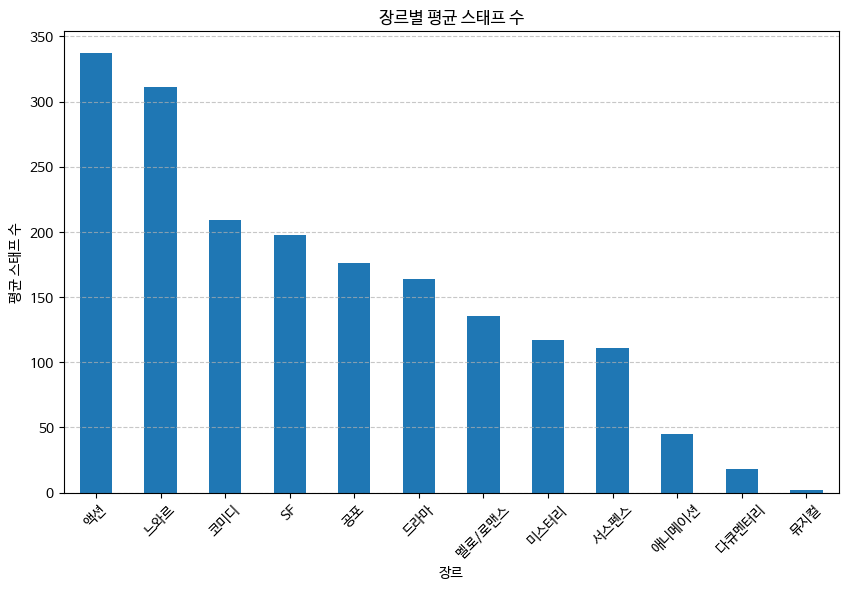

In [28]:
import matplotlib.pyplot as plt

genre_staff = data.groupby('genre')['num_staff'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_staff.plot(kind='bar')
plt.title('장르별 평균 스태프 수')
plt.ylabel('평균 스태프 수')
plt.xlabel('장르')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

✅ 액션, 느와르, 코미디의 평균 스태프수는 평균 200명대로 다른 장르에 비해 인력이 많이 투입되는 것을 확인할 수 있다.

✅ 반면 다큐멘터리는 스태프 수가 적은 경향이 있어 저예산 영화나 신인 감독이 도전하기 쉬울 것으로 예상된다.

## 2) 배급사별 특화 장르

- 상위 10개의 배급사를 선정하여, 각 배급사들이 어떤 장르의 영화를 주로 제작/배급하는지 subplots를 이용하여 비교해 보고자 하였다.
- 만약 어떤 배급사가 특정 장르에 집중한다면, 그 회사의 대략적인 시장 포지셔닝과 타겟팅하고 있는 관객층을 파악할 수 있다. 또한, 감독들은 자신이 제작한 영화 장르에 특화된 배급사를 찾기 쉬울 것이다.

### 2-1) 상위 10개 배급사 찾기
- distributor 컬럼에서 value_counts()를 사용하여 배급 횟수를 내림차순으로 정렬하고, head(10).index로 상위 10개의 인덱스를 반환한다. 그리고 이 반환된 인덱스 객체를 tolist()를 이용하여 리스트 형태로 바꿔 준다.

In [29]:
top10 = data['distributor'].value_counts(ascending = False).head(10).index.tolist()

### 2-2) subplots(): 각 배급사의 장르 분포 비교
- 이때 10개 그래프의 subplot 코드를 다 입력하는 것은 번거로우므로 enumerate로 인덱스와 배급사명을 함께 반환하는 반복문을 사용한다.
> 반복문으로 인덱스의 몫과 나머지를 계산하여 해당 값에 위치한 행과 열에 plot을 그림.

- 원본 data['distributor']와 top10의 distributor 값이 같은 행만 추출하여 subset 객체에 저장한다. 이 subset에 있는 genre를 value_counts()로 집계하여 상위 10개 배급사의 장르 분포를 시각화한다.

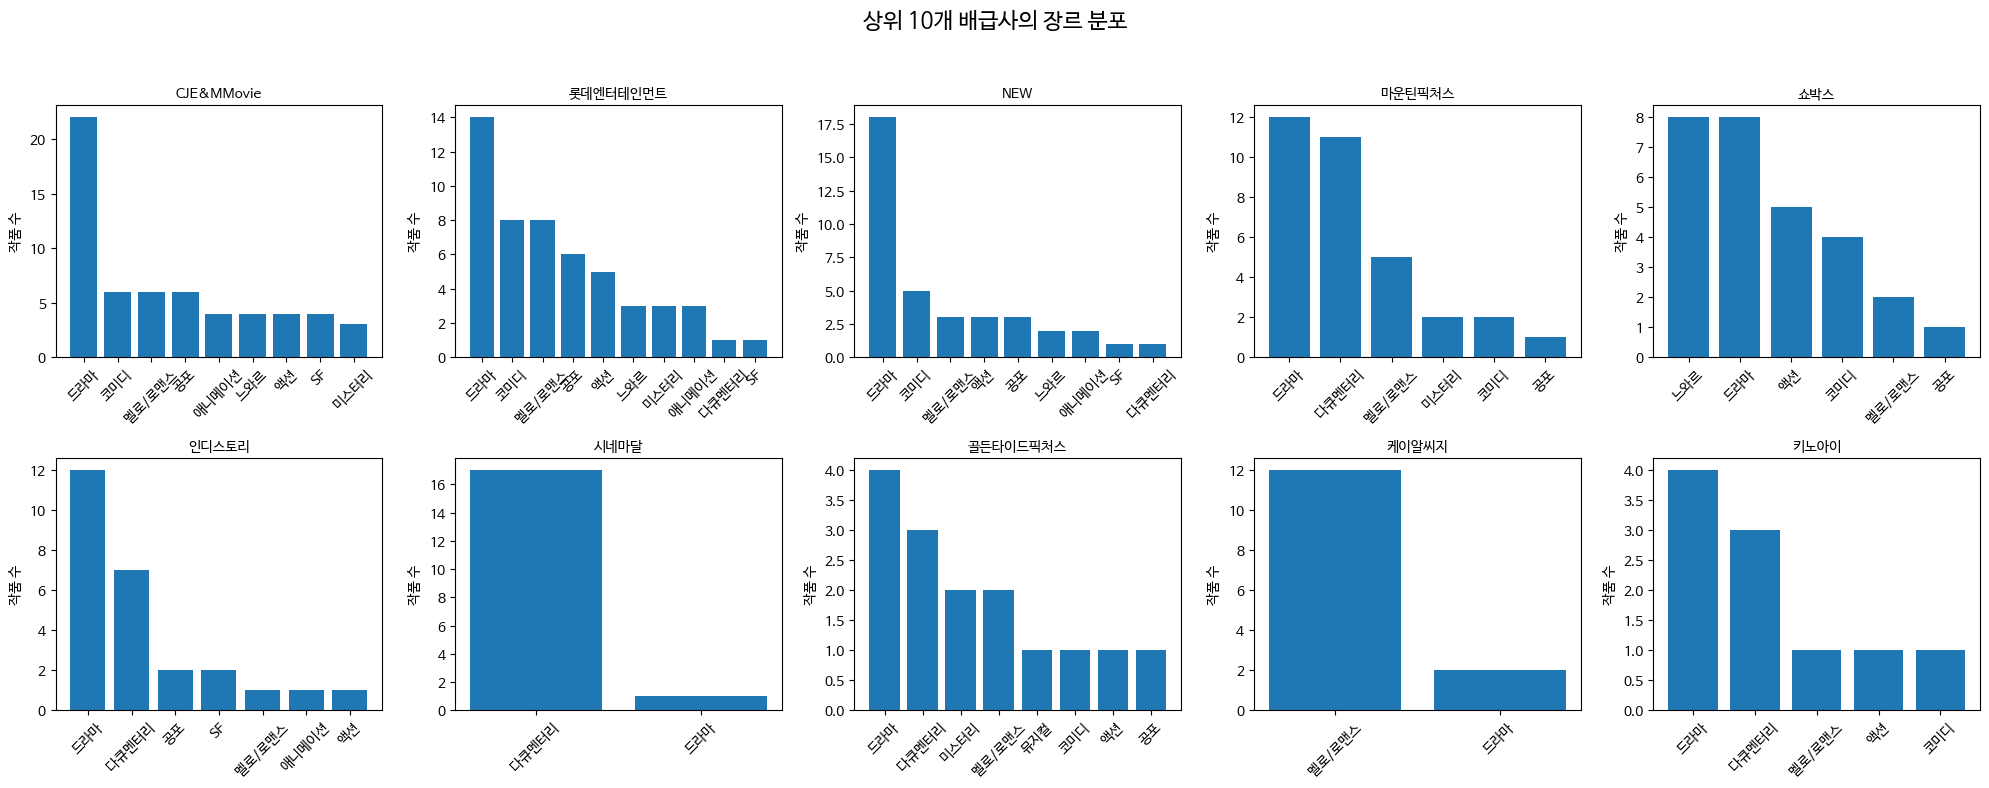

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, distributor in enumerate(top10):
    row = i // 5   #몫 -> subplot의 행 인덱스
    col = i % 5    #나머지 -> subplot의 열 인덱스

    subset = data[data['distributor'] == distributor]
    genre_counts = subset['genre'].value_counts()

    ax = axes[row][col]
    ax.bar(genre_counts.index, genre_counts.values)
    ax.set_title(distributor, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('작품 수')

plt.suptitle('상위 10개 배급사의 장르 분포', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

✅ CJE&M Movie, 롯데엔터테인먼트, NEW, 골든타이드픽처스는 다양한 장르를 배급하지만 그중에서도 드라마 장르의 개수가 두드러진다.
시네마달은 다큐멘터리 장르에 특화된 배급사이며, 케이알씨지는 멜로/로맨스 장르에 특화된 배급사임을 확인할 수 있다.

✅ 상위 10개의 배급사 모두 드라마 장르를 배급했다는 점에서, 드라마 장르가 가장 대중적인 장르인 것으로 보인다.

## 3) 상영등급에 따른 관객수

- 상영등급 별로 관객수를 나타냄으로써, 어떤 등급의 영화가 더 많은 관객을 끌어모으는지 파악할 수 있고,  타겟 관객층 설정의 중요성을 보여준다

In [31]:
train_rat = data.groupby('screening_rat')['box_off_num'].mean().reset_index()
train_rat

,screening_rat,box_off_num
0,12세 관람가,8.449809e+05
1,15세 관람가,1.247519e+06
2,전체 관람가,1.351005e+05
3,청소년 관람불가,3.624515e+05


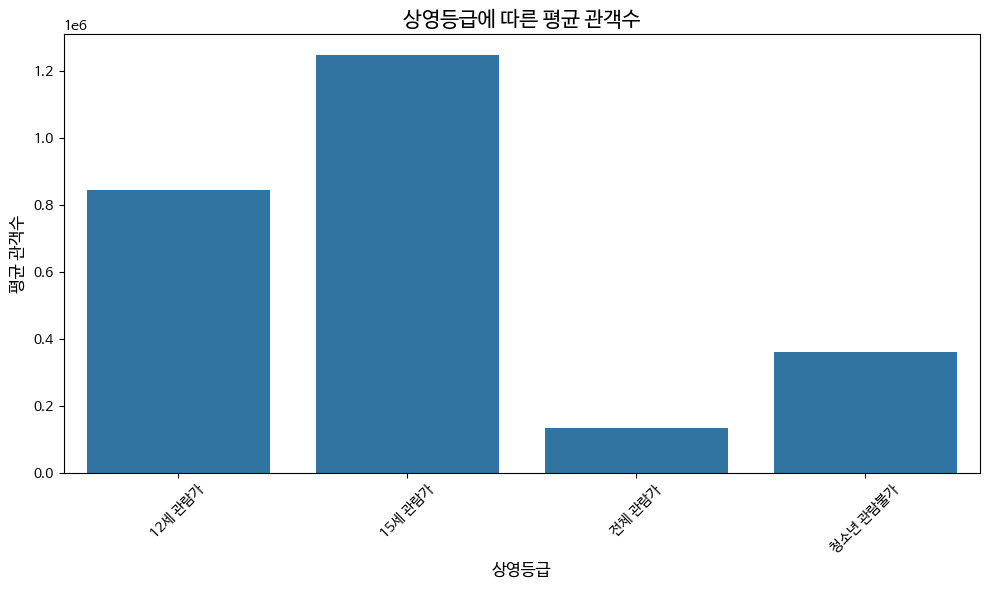

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=train_rat['screening_rat'], y=train_rat['box_off_num'])

plt.xlabel('상영등급', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)
plt.title('상영등급에 따른 평균 관객수', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

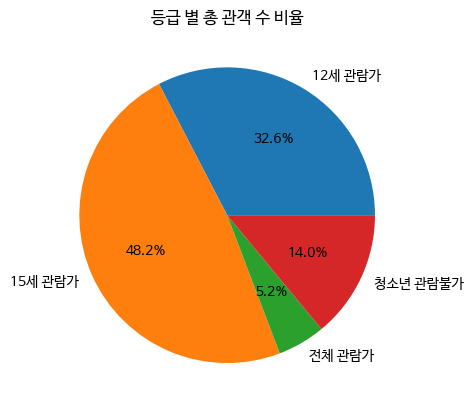

In [33]:
#비율로 나타내기

plt.pie(x=train_rat['box_off_num'], labels=train_rat['screening_rat'], autopct='%.1f%%')
plt.title('등급 별 총 관객 수 비율')
plt.show()

✅ 15세 관람가 영화가 평균 관객수가 가장 높음 -> 청소년부터 성인까지 넓은 관람층을 확보해 대중성과 수익성을 동시에 갖춘 핵심 상영등급임을 알 수 있다.

✅ 12세 관람가가 그다음으로 높음 -> 가족 영화, 청소년 대상 콘텐츠 등이 포함되어 중간 수준의 흥행 가능성이 있다.

✅ 청소년 관람불가 영화는 상대적으로 낮은 관객수 -> 성인 타깃의 강한 소재로 관람층이 제한되어 있다.

✅ 전체 관람가 영화는 의외로 평균 관객수가 가장 낮음 -> 어린이 대상 콘텐츠가 많아 일반 대중 흥미 유발에는 다소 약할 수 있다.

## 4) 감독 경험에 따른 관객 수

- 감독 경험이 관객 수에 영향을 미치는 지 파악한다.

### 4-1) 감독 경험 유무에 따른 평균 관객 수

In [34]:
data['director_experience'] = data['dir_prev_num'].apply(lambda x: '신인' if x == 0 else '경험 있음')
data[['director', 'dir_prev_num', 'director_experience']].head()

,director,dir_prev_num,director_experience
0,조병옥,0,신인
1,우민호,2,경험 있음
2,장철수,4,경험 있음
3,구자홍,2,경험 있음
4,신근호,1,경험 있음


In [35]:
exp_mean = data.groupby('director_experience')['box_off_num'].mean().reset_index()
exp_mean

,director_experience,box_off_num
0,경험 있음,1.142735e+06
1,신인,3.492043e+05


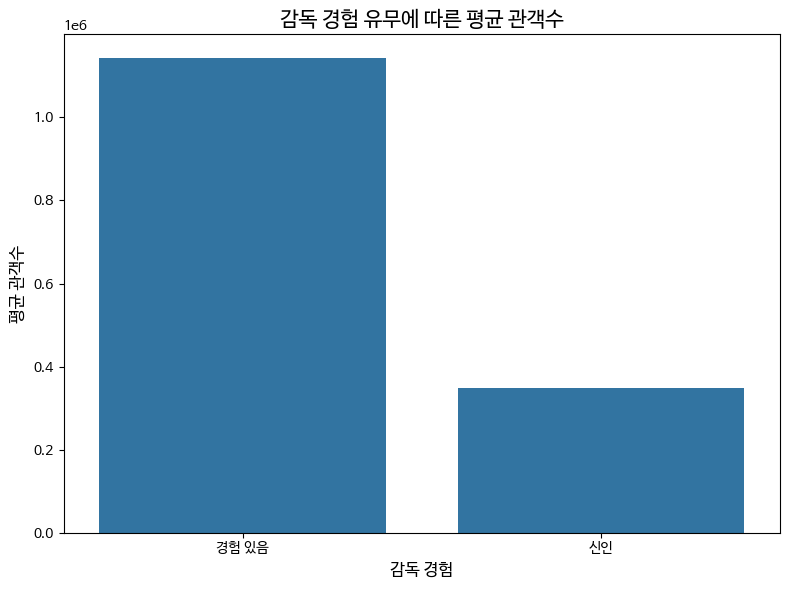

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x=exp_mean['director_experience'], y=exp_mean['box_off_num'])

plt.xlabel('감독 경험', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)
plt.title('감독 경험 유무에 따른 평균 관객수', fontsize=15)
plt.tight_layout()
plt.show()


✅ 경험 있는 감독이 만든 영화는 평균적으로 약 3배 많은 관객을 동원함 ->  감독의 경험이 작품의 흥행에 긍정적인 영향을 미친다고 해석할 수 있음.

✅투자자, 제작사 입장에서 경험 있는 감독과의 협업이 흥행 가능성을 높일 수 있음을 시사.

### 4-2) 감독의 이전 작품 수와 관객 수의 상관관계

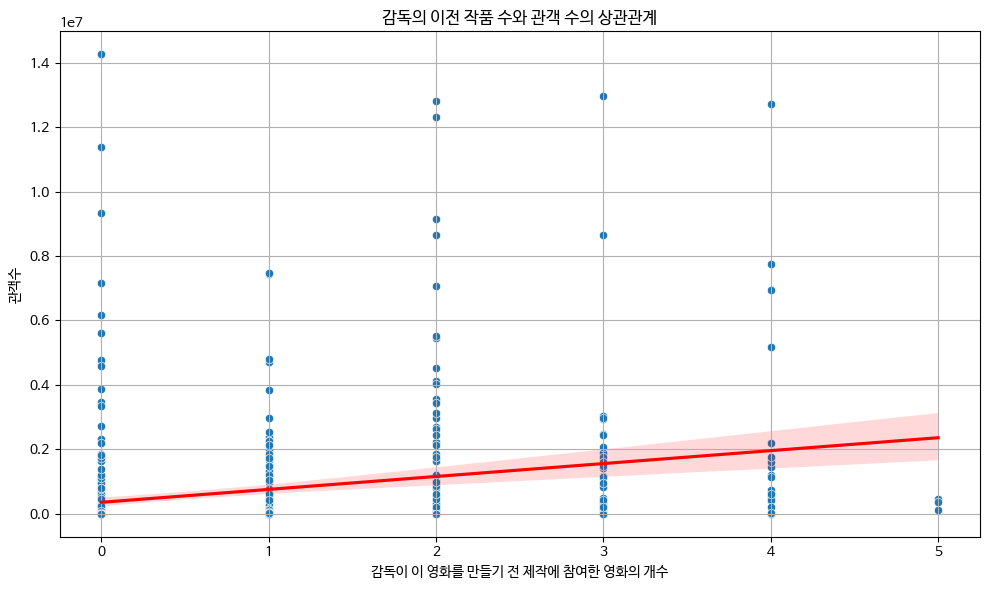

In [37]:
plt.figure(figsize=(10, 6))

# 산점도
sns.scatterplot(data=data, x='dir_prev_num', y='box_off_num')

# 선형 회귀선 추가 (점은 안 나오게)
sns.regplot(data=data, x='dir_prev_num', y='box_off_num', scatter=False, color='red')

# 제목, 축 라벨
plt.title('감독의 이전 작품 수와 관객 수의 상관관계')
plt.xlabel('감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수')
plt.ylabel('관객수')
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 감독의 이전 작품 수가 많을수록 관객 수가 증가하는 경향이 관찰된다.

✅ 선형 회귀선은 양의 기울기를 가지며, 약한 양의 상관관계를 시사한다.

✅ 하지만 상관관계는 완벽하지 않으며, 일부 신인 감독도 높은 관객 수를 기록한 사례도 존재한다. → 경험 외 다른 변수도 중요함 (예: 장르, 배우, 마케팅 등)

## 5) 영화 개봉 연도에 따른 총 관객 수

- 영화 산업의 관객 수 추이를 연도별로 파악함으로써, 한국 영화 시장의 변화를 이해할 수 있다.


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

In [39]:
#개봉 연도 추출
data['release_year'] = data['release_time'].dt.year
#연도별 총 관객 수 계산
yearly_audience = data.groupby('release_year')['box_off_num'].sum().reset_index()

In [40]:
#연도별 총 관객 수 출력
print(yearly_audience)

   release_year  box_off_num
0          2010     48749235
1          2011     50309371
2          2012     83223817
3          2013     95698992
4          2014     75423331
5          2015     71513871


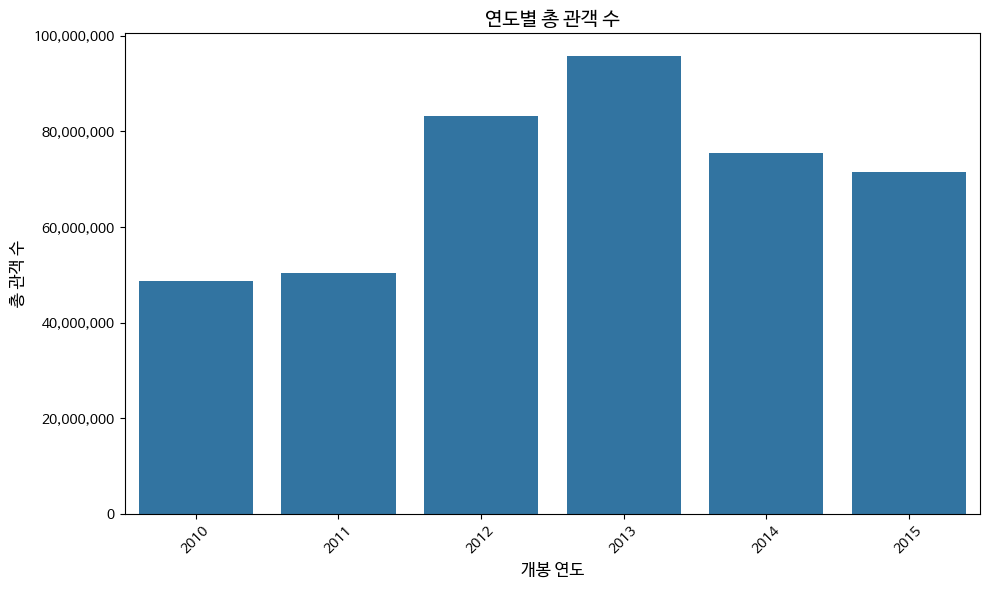

In [41]:
#시각화 시작
plt.figure(figsize = (10,6))
#연도별 총 관객 수 막대그래프
sns.barplot(data = yearly_audience, x = 'release_year', y = 'box_off_num')
#제목 및 축 라벨 설정
plt.title('연도별 총 관객 수', fontsize=14)
plt.xlabel('개봉 연도', fontsize=12)
plt.ylabel('총 관객 수', fontsize=12)
#x축 라벨 회전
plt.xticks(rotation = 45)
#y축 숫자를 천 단위 콤마로 제시
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
#레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

✅ 연도별 총 관객 수를 살펴보면, 2012년과 2013년에 급격한 증가가 나타난다. 이후 2014년부터는 소폭 감소하는 양상을 보인다.

✅ 이는 2012~2013년에 대형 흥행작이 집중되었거나, 영화 관람 수요가 일시적으로 증가했음을 시사한다.

### 5-1) 1,000만 관객 돌파 영화 개수

- 연도별 1,000만 관객 돌파 영화 수를 분석함으로써, 해당 연도의 흥행이 특정 영화에 집중되었는지 혹은 여러 영화에 분산되었는지를 파악하고자 하였다.

In [42]:
#1000만 이상 영화 필터링
big_hits = data[data['box_off_num'] >= 1e7]
#연도별로 개수 세기
hit_counts = big_hits.groupby('release_year').size().reset_index(name = 'hit_movie_count')

In [43]:
print(hit_counts)

   release_year  hit_movie_count
0          2012                2
1          2013                2
2          2014                1
3          2015                1


## 6) 영화 개봉 월에 따른 평균 관객 수 ##

- 영화 개봉 시기는 흥행에 큰 영향을 미치는 요소 중 하나로, 관객들이 많이 찾는 시기를 파악하는 것은 배급 전략 수립에 있어 매우 중요하다.
- 영화가 어느 달에 개봉했을 때 평균 관객 수가 높았는지를 파악함으로써, 시기적 요소가 관객 수에 미치는 영향을 간접적으로 분석한다.

In [44]:
#개봉월을 추출하여 새 칼럼 'release_month'를 생성
data['release_month'] = data['release_time'].dt.month
#월별 평균 관객 수 계산
monthly_audience = data.groupby('release_month')['box_off_num'].mean().reset_index()

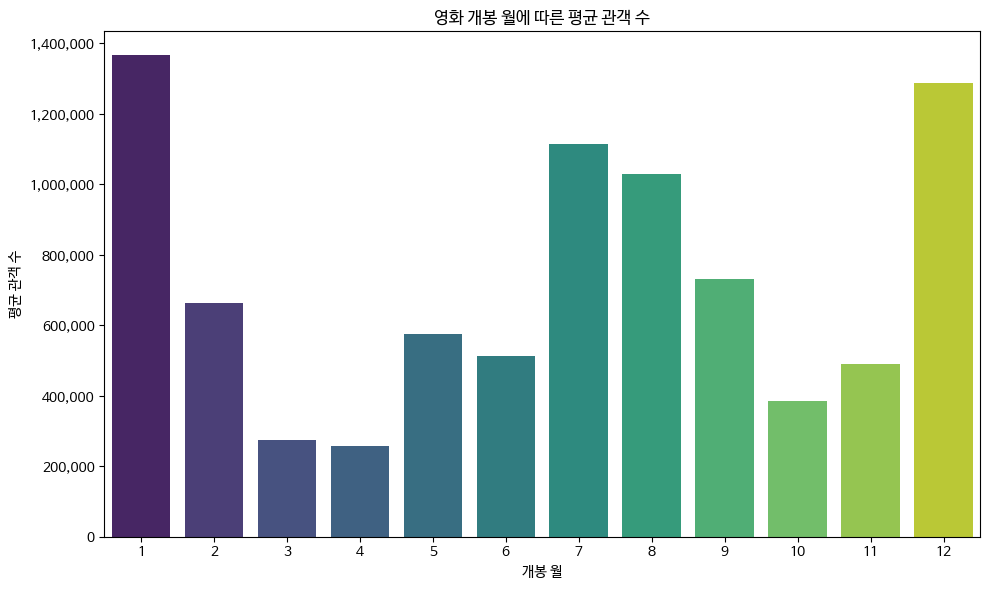

In [45]:
#시각화 시작
plt.figure(figsize=(10, 6))
#월별 평균 관객 수 바그래프
sns.barplot(data=monthly_audience, x='release_month', y='box_off_num', palette='viridis')
#제목 및 축 라벨 설정
plt.title('영화 개봉 월에 따른 평균 관객 수')
plt.xlabel('개봉 월')
plt.ylabel('평균 관객 수')
#y축에 천 단위 콤마로 포맷팅
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
#레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

✅ 평균 관객 수는 1월, 7월, 12월에 가장 높게 나타나, 방학 및 연말 시즌이 흥행에 유리한 시기임을 보여준다.

✅ 반면, 3월, 4월, 10월은 관객 수가 낮아 상대적으로 비수기로 해석할 수 있다.

## 7) 상영 시간에 따른 관객 수

- 영화의 상영 시간은 관객의 몰입도, 지루함, 장르 특성과 밀접한 관련이 있으며, 이는 흥행 성적에도 영향을 줄 수 있다.
- 상영 시간이 짧거나 긴 영화가 관객 수에서 어떤 차이를 보이는지를 확인하여, 상영 시간과 흥행 사이의 관계를 분석하고자 한다.

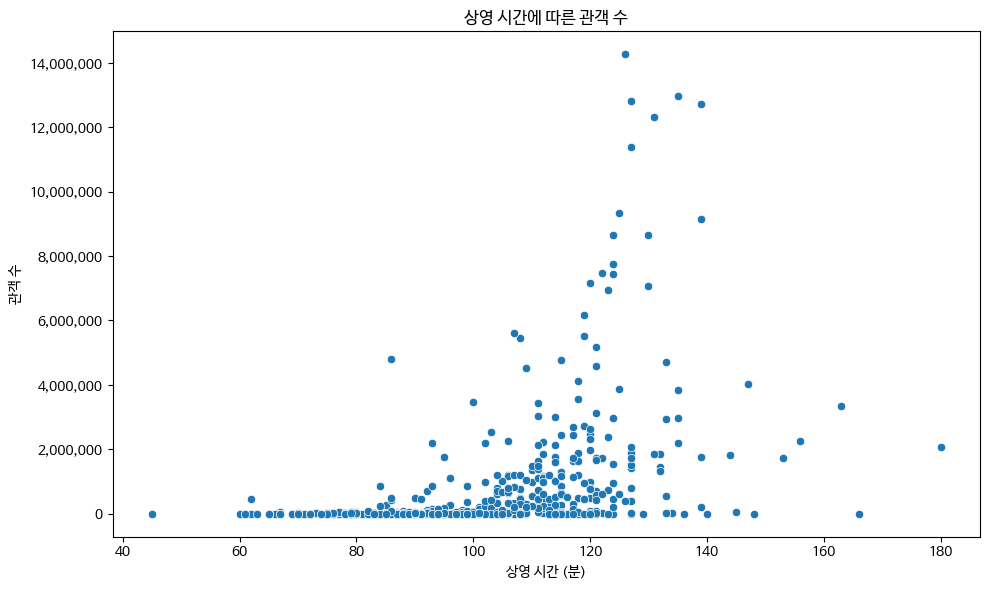

In [46]:
#그래프 크기 설정
plt.figure(figsize=(10, 6))
#각 영화의 상영 시간과 총 관객 수를 산점도로 시각화
sns.scatterplot(data=data, x='time', y='box_off_num')
#제목 및 축 라벨 설정
plt.title('상영 시간에 따른 관객 수')
plt.xlabel('상영 시간 (분)')
plt.ylabel('관객 수')
#y축에 천 단위 콤마로 포맷팅
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
#레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

✅ 상영시간이 100~130분 사이인 영화들이 가장 많고, 관객 수도 해당 구간에 집중되어 있다. 이는 흥행작들이 특정 러닝타임 내에 몰려 있음을 보여주며, 너무 짧거나 긴 상영 시간은 흥행에 불리할 수 있음을 시사한다.

## 8) 배급사(상위 5개) 별 평균 관객 수

- 배급사 별 평균 관객 수를 확인함으로써 가장 인기 있는 배급사를 파악할 수 있다.

In [47]:
#배급사 별 평균 관객 수 계산, 평균이 높은 5개의 배급사만 추출
top5_mean=data.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False).head(5).reset_index()
top5_mean

,distributor,box_off_num
0,쇼박스,3.332954e+06
1,아이필름코퍼레이션,3.117859e+06
2,영구아트무비,2.541603e+06
3,CJE&MMovie,2.246588e+06
4,NEW,1.939060e+06


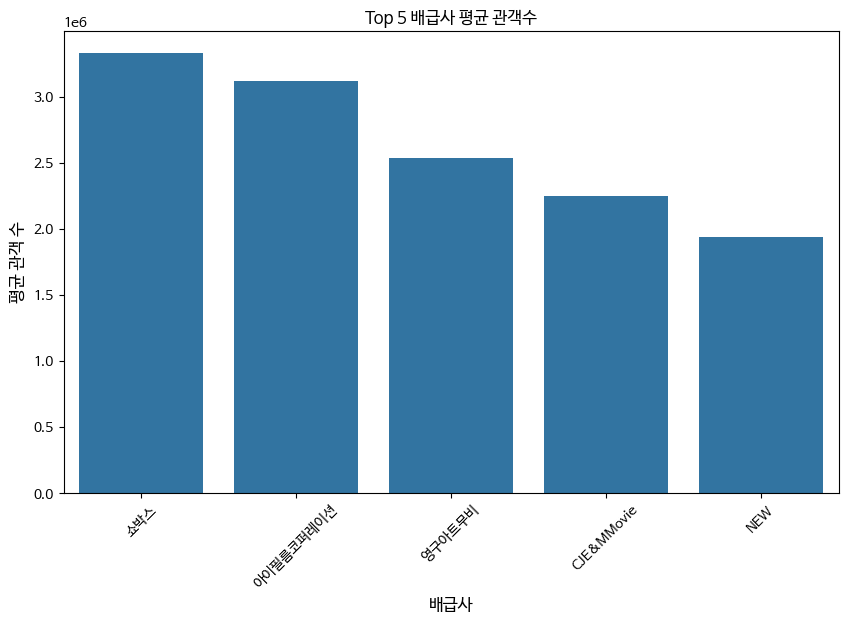

In [48]:
#데이터 시각화
plt.figure(figsize=(10, 6))

#바플롯으로 시각화
sns.barplot(data=top5_mean, x='distributor', y='box_off_num')

#그래프 제목 및 라벨
plt.title('Top 5 배급사 평균 관객수')
plt.xlabel('배급사', fontsize=12)
plt.ylabel('평균 관객 수', fontsize=12)

#x축 라벨 회전
plt.xticks(rotation=45)

#그래프 출력
plt.show()


✅ 상위 5개의 배급사 중에서는 쇼박스, 아이필름코퍼레이션, 영구아트무비, CJE&M Movie, NEW 순으로 관객 수가 많았다. 쇼박스가 약 333만명의 평균 관객 수를 보이며 1위를 차지하였다.

✅ 실제 점유율은 CJ가 1위인 데에 반해 해당 자료에는 관객 수가 적었던 영화도 많이 포함되어 있어 평균이 낮게 나왔다는 점이 흥미로웠다.

## 9) 주연 배우 수에 따른 평균 스텝 수

- 주연 배우 수에 따른 투입되어야 하는 스텝 수에 대한 궁금증이 생겨 이를 확인해보고자 한다.

In [49]:
#주연 배우 수에 따른 평균 스텝 수 계산
num_act_staff=data.groupby('num_actor')['num_staff'].mean().sort_values().reset_index()
#계산된 결과를 주연 배우 수에 따라 오름차순 정렬
num_act_staff=num_act_staff.sort_values(by='num_actor', ascending=True)
num_act_staff.head()

,num_actor,num_staff
0,0,6.222222
2,1,56.085714
8,2,154.331169
11,3,167.174825
9,4,157.228070


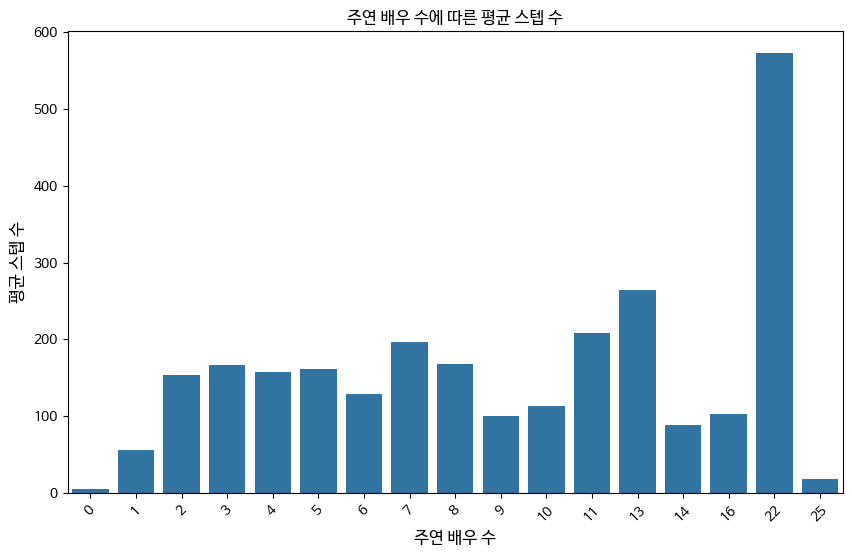

In [50]:
#데이터 시각화
plt.figure(figsize=(10, 6))

#바플롯으로 시각화
sns.barplot(data=num_act_staff, x='num_actor', y='num_staff')
#그래프 제목 및 라벨
plt.title('주연 배우 수에 따른 평균 스텝 수')
plt.xlabel('주연 배우 수', fontsize=12)
plt.ylabel('평균 스텝 수', fontsize=12)

#x축 라벨 회전
plt.xticks(rotation=45)

#그래프 출력
plt.show()

✅ 특별한 규칙성을 보이지는 않는다는 것이 확인 되었으며, 주연 배우 수보다는 촬영 규모(세트 등)가 스텝 수를 결정하는 데 더 큰 영향을 끼친다는 것을 추측할 수 있다.

✅ 주연 배우 수가 25명일 때가 1명일 때보다 평균 스텝 수가 더 낮다는 점이 특이하다.
- 해당 영화를 인터넷에 검색해보았으나 정보가 많이 뜨지 않아 아쉽다.

✅ 주연 배우 수가 22명일 때도 상당히 특이하다.

In [51]:
data[data['num_actor']==22]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,director_experience,release_year,release_month
487,뷰티 인사이드,NEW,멜로/로맨스,2015-08-20,127,12세 관람가,백종열,4.210890e+06,3,572,22,2057896,경험 있음,2015,8


- 하나의 영화만으로 이러한 결과가 나온 것으로 보아 유의미한 결과라고는 볼 수 없다.

## 10) 장르별 평균 관객 수

In [52]:
data['genre'].value_counts(ascending=False)

,count
genre,
드라마,222
다큐멘터리,93
멜로/로맨스,78
코미디,53
공포,42
액션,28
느와르,27
애니메이션,21
미스터리,17


- 장르별 영화의 개수를 확인했을 때는 드라마가 가장 많은 것을 알 수 있다.

In [53]:
#각 장르별 평균 관객 수 계산
#장르별 전체 관객 수 / 장르별 영화 수
average_box_off = data.groupby('genre')['box_off_num'].sum() / data['genre'].value_counts(ascending=False)

In [54]:
average_box_off = average_box_off.sort_values(ascending=False)
print(average_box_off)

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.229145e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
dtype: float64


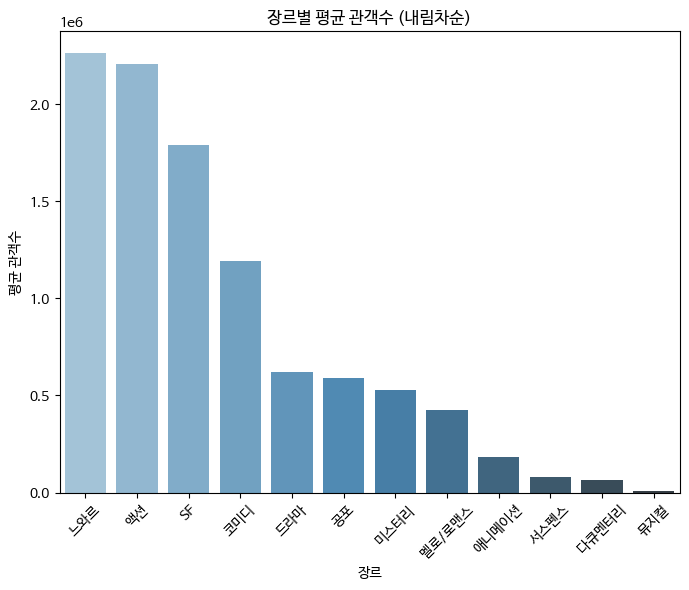

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_box_off.index, y=average_box_off.values, palette='Blues_d')
plt.title('장르별 평균 관객수 (내림차순)')
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.xticks(rotation=45)  #x축 레이블 각도 조정 (옵션)
plt.show()

✅ 느와르, 액션, SF 순으로 평균 관객 수가 많으며 서스펜스, 다큐멘터리, 뮤지컬이 가장 적은 것을 알 수 있다.

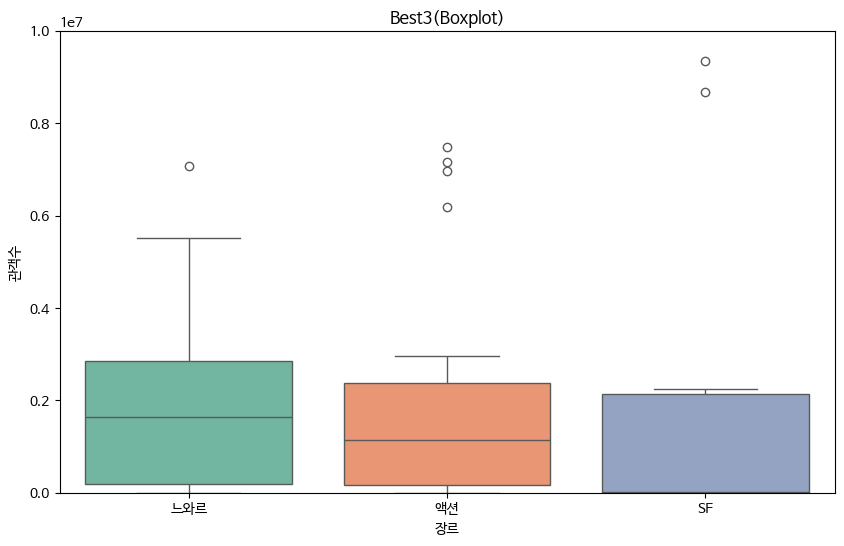

In [56]:
ordered_genres = ['느와르', '액션', 'SF']

# 시각화 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='box_off_num', data=data, order=ordered_genres, palette='Set2')
plt.title('Best3(Boxplot)')
plt.xlabel('장르')
plt.ylabel('관객수')
plt.ylim(0,10000000)
plt.show()

✅ 상위 3개 장르의 box_off_num은 대략적으로 보았을 때는 느와르가 가장 많고, 액션과 SF는 크게 차이가 없으며, outlier에 따라 average_box_off_num이 차이가 났음을 알 수 있다.

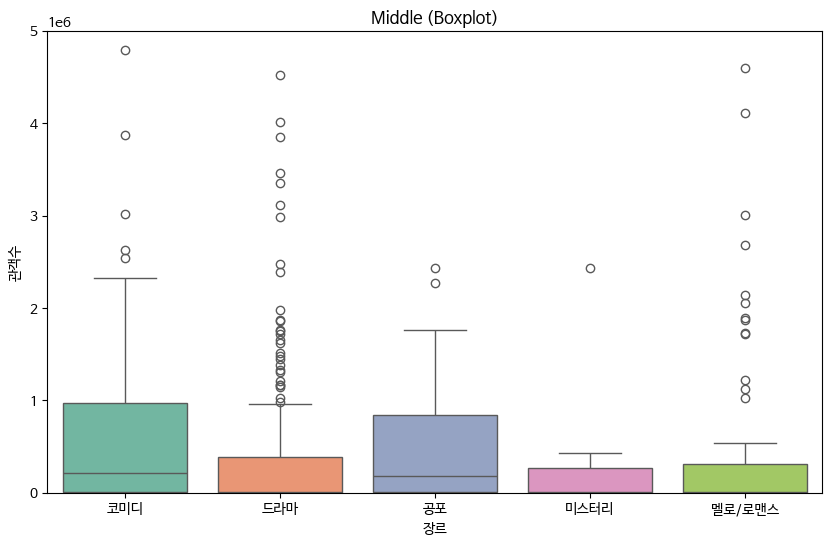

In [57]:
ordered_genres2 = ['코미디','드라마','공포','미스터리','멜로/로맨스']

# 시각화 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='box_off_num', data=data, order=ordered_genres2, palette='Set2')
plt.title('Middle (Boxplot)')
plt.xlabel('장르')
plt.ylabel('관객수')
plt.ylim(0,5000000)
plt.show()

✅ 중간 6개 장르를 살펴보았을 때, 앞서 봤던 Best 3에 비해 대략적인 분포가 장르별로 크게 차이가 나는 것을 알 수 있다. 위에서 보았던 average_box_off_num과 다르게 코미디, 공포가 box_off_num이 크게 나타나며, 드라마, 미스터리, 멜로/로맨스가 비슷하게 나타나고, 애니메이션이 가장 적은 것을 알 수 있다.

✅ 드라마의 average_box_off_num이 크게 나타난 이유는 표본이 많고, outlier가 많기 때문이라는 것을 알 수 있다.

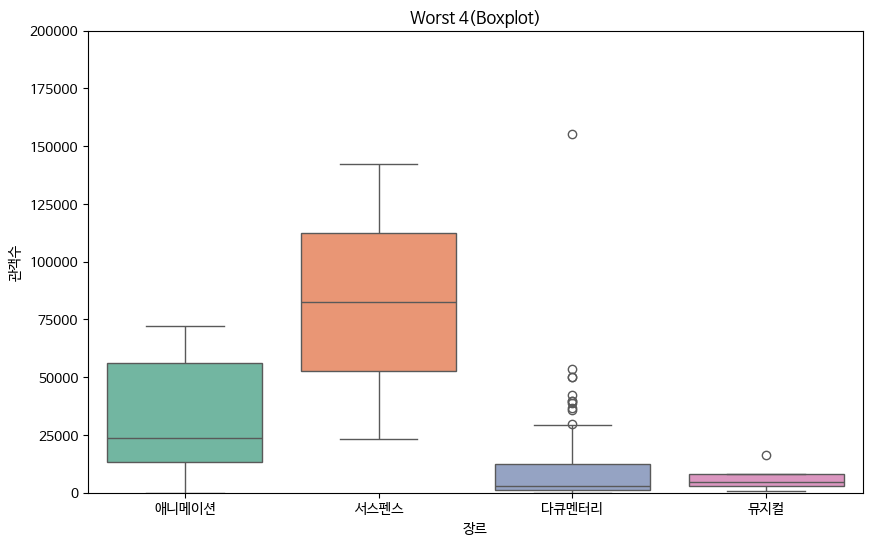

In [58]:
ordered_genres3 = ['애니메이션', '서스펜스', '다큐멘터리', '뮤지컬']

# 시각화 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='box_off_num', data=data, order=ordered_genres3, palette='Set2')
plt.title('Worst 4(Boxplot)')
plt.xlabel('장르')
plt.ylabel('관객수')
plt.ylim(0,200000)
plt.show()

✅ 하위 3개 장르를 살펴보았을 때, 서스펜스는 다큐멘터리와 뮤지컬보다 확연히 높은 box_off_num을 가지며 이는 중간 6개의 장르와 비슷한 분포를 가지고 있다. 또한, 다큐멘터리, 뮤지컬의 경우도 미세한 차이로 다큐멘터리가 더 높은 것을 확인할 수 있고, 다큐멘터리의 경우 더 많은 outlier가 나타나는 것을 확인할 수 있다.

✅ 평균이 아닌 boxplot을 통해 판단한 장르별 관객 수는 느와르-액션-SF-코미디-공포-드라마-멜로/로맨스-미스터리-서스펜스-애니메이션-다큐멘터리-뮤지컬 순으로 적어지는 것을 확인할 수 있으며, 평균과 차이가 나타나는 이유는 표본의 개수에 따라 가중치에서 크게 차이가 나기도 하고, 드라마와 같이 outlier가 많이 나타날 경우 평균이 높아지는 경향이 있기 때문으로 알 수 있다.

## 11)	계절별 장르 선호도

In [59]:
#계절을 나누는 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

data_season = data.copy()
data_season['season'] = data_season['release_time'].dt.month.apply(get_season)

print(data_season.head())

       title distributor genre release_time  time screening_rat director  \
0     개들의 전쟁    롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가      조병옥   
1       내부자들         쇼박스   느와르   2015-11-19   130      청소년 관람불가      우민호   
2  은밀하게 위대하게         쇼박스    액션   2013-06-05   123       15세 관람가      장철수   
3   나는 공무원이다         NEW   코미디   2012-07-12   101        전체 관람가      구자홍   
4       불량남녀         쇼박스   코미디   2010-11-04   108       15세 관람가      신근호   

   dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  \
0            0.00             0         91          2        23398   
1      1161602.50             2        387          3      7072501   
2       220775.25             4        343          4      6959083   
3        23894.00             2         20          6       217866   
4            1.00             1        251          2       483387   

  director_experience  release_year  release_month  season  
0                  신인          2012             11    Fall  


- 3-5월은 봄, 6-8월은 여름, 9-11월은 가을, 12-2월은 겨울로 간주해 season이라는 새로운 열을 추가한다.

In [60]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
data_season['season'].value_counts().reindex(season_order)

,count
season,
Spring,156
Summer,133
Fall,193
Winter,119


✅ 가을에 영화가 가장 많이 개봉하며, 겨울에 영화가 가장 적게 개봉하는 것을 알 수 있다.

### < 계절별 평균 관객 수 >

In [61]:
data_season.groupby('season')['box_off_num'].mean()

,box_off_num
season,
Fall,5.323451e+05
Spring,3.794233e+05
Summer,9.476448e+05
Winter,1.150834e+06


✅ 계절별 평균 관객 수는 겨울-여름-가을-봄 순으로 나타나는 것을 확인할 수 있다.

### < 계절별 장르에 따른 관객수 평균 >

In [78]:
data_season.groupby('season')['genre'].value_counts()

season  genre 
봄       SF        0
        공포        0
        느와르       0
        다큐멘터리     0
        드라마       0
        멜로/로맨스    0
        뮤지컬       0
        미스터리      0
        서스펜스      0
        애니메이션     0
        액션        0
        코미디       0
여름      SF        0
        공포        0
        느와르       0
        다큐멘터리     0
        드라마       0
        멜로/로맨스    0
        뮤지컬       0
        미스터리      0
        서스펜스      0
        애니메이션     0
        액션        0
        코미디       0
가을      SF        0
        공포        0
        느와르       0
        다큐멘터리     0
        드라마       0
        멜로/로맨스    0
        뮤지컬       0
        미스터리      0
        서스펜스      0
        애니메이션     0
        액션        0
        코미디       0
겨울      SF        0
        공포        0
        느와르       0
        다큐멘터리     0
        드라마       0
        멜로/로맨스    0
        뮤지컬       0
        미스터리      0
        서스펜스      0
        애니메이션     0
        액션        0
        코미디       0
Name: count, dtype: int64

In [72]:
season_genre_avg_box_off = data_season.groupby(['season', 'genre'])['box_off_num'].mean().reset_index()
print(season_genre_avg_box_off)

    season   genre   box_off_num
0     Fall      SF  2.130645e+06
1     Fall      공포  5.906292e+05
2     Fall     느와르  2.865460e+06
3     Fall   다큐멘터리  2.078294e+05
4     Fall     드라마  5.390045e+05
5     Fall  멜로/로맨스  3.026356e+05
6     Fall     뮤지컬  7.511500e+03
7     Fall    미스터리  9.088427e+05
8     Fall    서스펜스  2.305200e+04
9     Fall   애니메이션  2.699880e+04
10    Fall      액션  9.842235e+05
11    Fall     코미디  4.656676e+05
12  Spring      SF  2.085667e+03
13  Spring      공포  6.541705e+05
14  Spring     느와르  1.061615e+06
15  Spring   다큐멘터리  8.786481e+03
16  Spring     드라마  2.517928e+05
17  Spring  멜로/로맨스  4.531391e+05
18  Spring    미스터리  5.450250e+05
19  Spring    서스펜스  1.421700e+05
20  Spring   애니메이션  6.895260e+04
21  Spring      액션  1.076281e+06
22  Spring     코미디  1.176975e+06
23  Summer      SF  3.012796e+06
24  Summer      공포  6.897945e+05
25  Summer     느와르  4.253886e+06
26  Summer   다큐멘터리  7.303579e+03
27  Summer     드라마  5.662849e+05
28  Summer  멜로/로맨스  2.069336e+05
29  Summer

In [64]:
genre_order = ['느와르', '액션', 'SF', '코미디', '공포', '드라마', '멜로/로맨스', '미스터리','서스펜스', '애니메이션', '다큐멘터리', '뮤지컬']

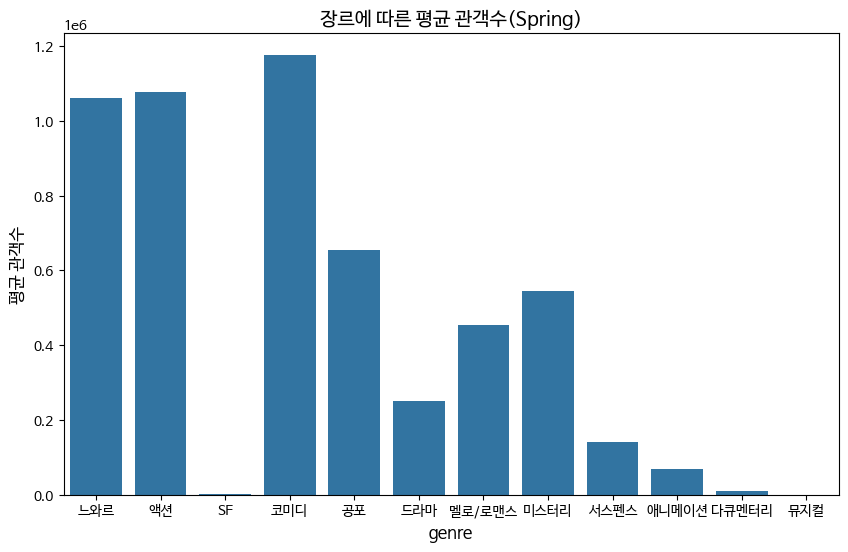

In [65]:
spring_data = season_genre_avg_box_off[season_genre_avg_box_off['season'] == 'Spring']

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='box_off_num', data=spring_data, order=genre_order)

#그래프 제목과 라벨 설정
plt.title('장르에 따른 평균 관객수(Spring)', fontsize=14)
plt.xlabel('genre', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)

#그래프 표시
plt.show()

✅ 봄에는 느와르, 액션, 코미디 영화의 관객수가 높게 나타나는 것을 확인할 수 있다. SF의 경우 높게 나타나지 않았는데 이때 개봉한 SF 영화가 3개 뿐이기 때문으로 추측해볼 수 있다.

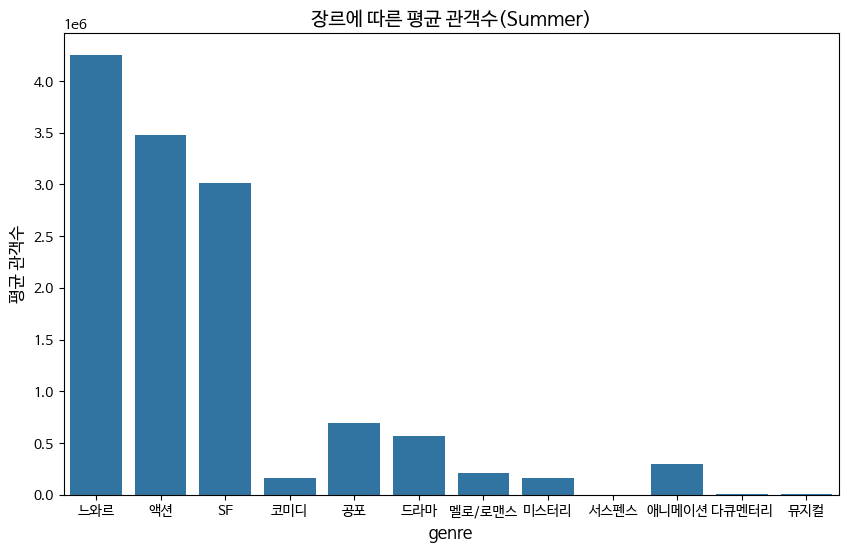

In [66]:
summer_data = season_genre_avg_box_off[season_genre_avg_box_off['season'] == 'Summer']

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='box_off_num', data=summer_data, order=genre_order)

# 그래프 제목과 라벨 설정
plt.title('장르에 따른 평균 관객수(Summer)', fontsize=14)
plt.xlabel('genre', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)

# 그래프 표시
plt.show()

✅ 여름에는 느와르, 액션, SF의 관객수가 압도적으로 높은 것을 알 수 있다.

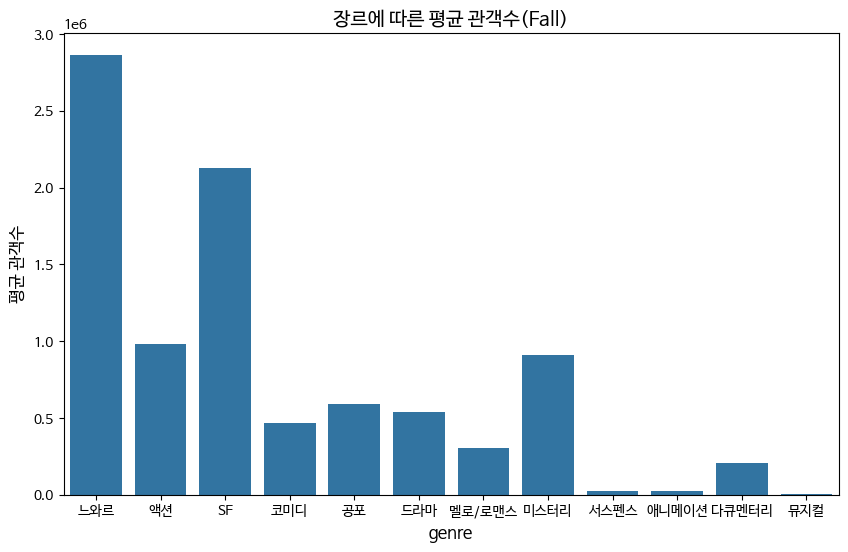

In [67]:
fall_data = season_genre_avg_box_off[season_genre_avg_box_off['season'] == 'Fall']

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='box_off_num', data=fall_data, order=genre_order)

# 그래프 제목과 라벨 설정
plt.title('장르에 따른 평균 관객수(Fall)', fontsize=14)
plt.xlabel('genre', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)

# 그래프 표시
plt.show()

✅ 가을에는 느와르, SF의 관객수가 가장 많고, 액션, 미스터리의 관객수가 높게 나타난 것을 확인할 수 있다.

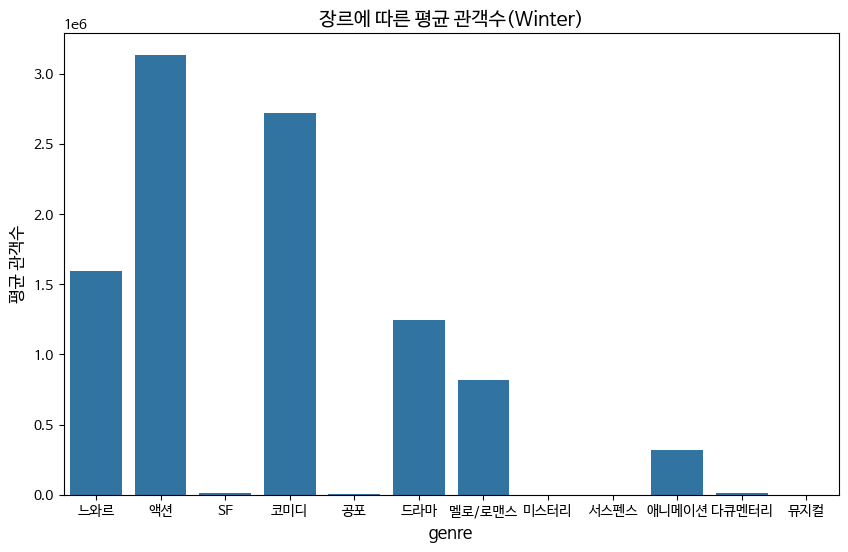

In [68]:
winter_data = season_genre_avg_box_off[season_genre_avg_box_off['season'] == 'Winter']

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='box_off_num', data=winter_data, order= genre_order)

# 그래프 제목과 라벨 설정
plt.title('장르에 따른 평균 관객수(Winter)', fontsize=14)
plt.xlabel('genre', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)

# 그래프 표시
plt.show()

✅ 겨울에는 액션, 코미디, 느와르, 드라마, 멜로/로맨스의 관객수가 높게 나타나는 것을 확인할 수 있다.

✅ 계절별로 좋아하는 장르에 관해 분석해보고자 세운 가설이었으나, 계절별 장르에 따른 평균 관객수는 계절별로 크게 다르지 않으며, 계절에 대한 특성보다는 개봉 장르가 더 유의미한 영향을 미치는 것을 알 수 있다.